In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("/content/Untitled spreadsheet - Ecommerce_Logistics_and_Delivery_Gigantic_Dataset.csv.csv")
df.head(10)

,Shipment_ID,Order_Date,Region,City,Delivery_Partner,Shipping_Mode,Delivery_Time_Days,Order_Value,Delivery_Status,Customer_Rating
0,900000,2022-09-05,North,Ahmedabad,Ecom Express,Standard,8.0,171575.41,Delivered,4.0
1,900001,2023-03-29,West,Ahmedabad,BlueDart,Standard,10.0,8628.10,Delayed,3.0
2,900002,2022-03-23,South,Hyderabad,BlueDart,Standard,12.0,161353.25,Cancelled,3.0
3,900003,2024-01-25,West,Hyderabad,Ecom Express,Standard,14.0,57509.48,Delayed,2.0
4,900004,2023-11-11,South,Mumbai,Ecom Express,Standard,14.0,154628.04,Delivered,1.0
5,900005,2022-11-24,North,Pune,BlueDart,Standard,14.0,26081.56,Delayed,4.0
6,900006,2024-01-14,West,Kolkata,NaN,Standard,6.0,60491.69,Delivered,5.0
7,900007,2024-02-23,NaN,Pune,BlueDart,Express,14.0,145806.18,Delayed,1.0
8,900008,2023-09-02,South,Bengaluru,BlueDart,Express,6.0,32155.33,Delivered,2.0
9,900009,2021-07-08,North,Kolkata,Ecom Express,Express,7.0,145025.32,Delivered,5.0


In [27]:
df.shape

(73500, 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73500 entries, 0 to 73499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shipment_ID         73500 non-null  int64  
 1   Order_Date          73500 non-null  object 
 2   Region              58743 non-null  object 
 3   City                65245 non-null  object 
 4   Delivery_Partner    65962 non-null  object 
 5   Shipping_Mode       73500 non-null  object 
 6   Delivery_Time_Days  68652 non-null  float64
 7   Order_Value         73500 non-null  float64
 8   Delivery_Status     69884 non-null  object 
 9   Customer_Rating     66117 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 5.6+ MB


In [29]:
df.isnull()

,Shipment_ID,Order_Date,Region,City,Delivery_Partner,Shipping_Mode,Delivery_Time_Days,Order_Value,Delivery_Status,Customer_Rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73495,False,False,False,False,False,False,False,False,False,False
73496,False,False,False,False,False,False,False,False,False,False
73497,False,False,False,False,False,False,False,False,False,False
73498,False,False,False,False,False,False,False,False,False,False


<Axes: >

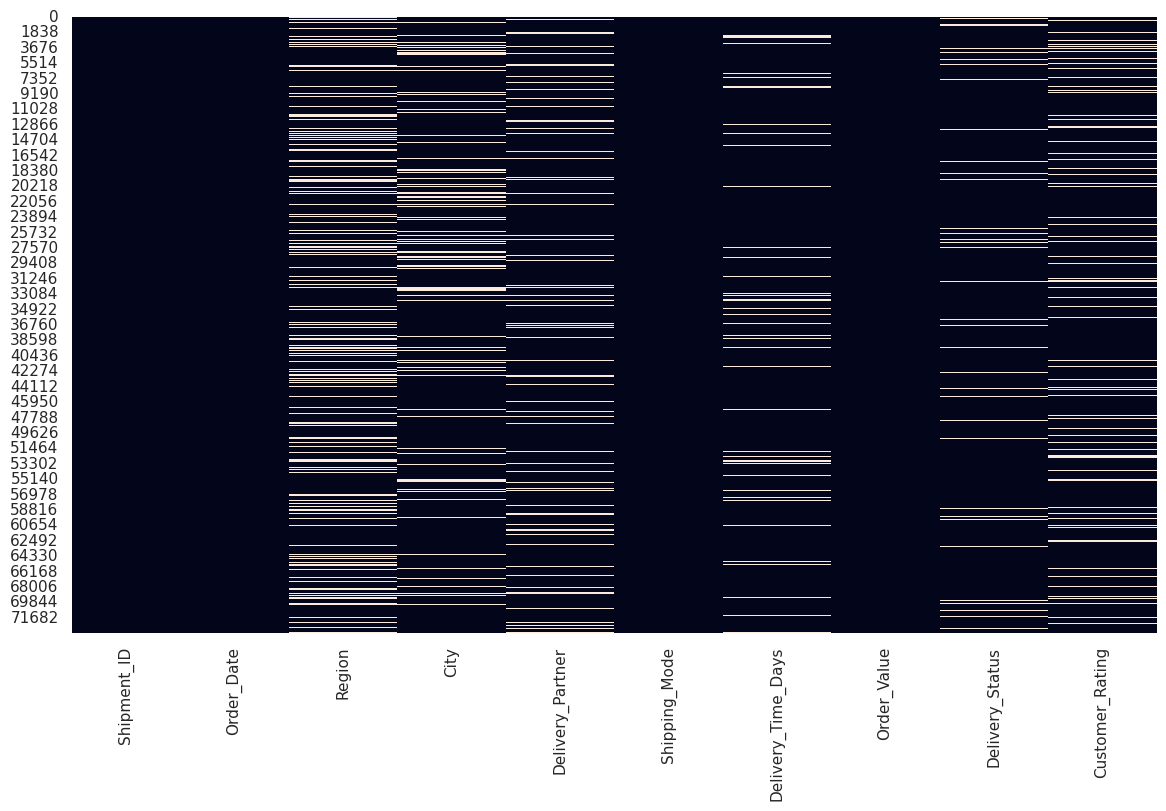

In [30]:
sns.set(rc={"figure.figsize":(14,8)})
sns.heatmap(df.isnull(),cbar=False)

In [31]:
df.isnull().sum()

,0
Shipment_ID,0
Order_Date,0
Region,14757
City,8255
Delivery_Partner,7538
Shipping_Mode,0
Delivery_Time_Days,4848
Order_Value,0
Delivery_Status,3616
Customer_Rating,7383


In [32]:
df.isnull().sum()/df.shape[0]*100

,0
Shipment_ID,0.000000
Order_Date,0.000000
Region,20.077551
City,11.231293
Delivery_Partner,10.255782
Shipping_Mode,0.000000
Delivery_Time_Days,6.595918
Order_Value,0.000000
Delivery_Status,4.919728
Customer_Rating,10.044898


In [33]:
df.isnull().sum().sum()

np.int64(46397)

In [34]:
for i in df.select_dtypes(include="float64").columns:
  df[i]=df[i].fillna(df[i].median())

In [35]:
df.isnull().sum()

,0
Shipment_ID,0
Order_Date,0
Region,14757
City,8255
Delivery_Partner,7538
Shipping_Mode,0
Delivery_Time_Days,0
Order_Value,0
Delivery_Status,3616
Customer_Rating,0


In [36]:
a=df["Delivery_Status"].mode()
df["Delivery_Status"]=df["Delivery_Status"].fillna(a[0])

In [37]:
df["Delivery_Status"].unique()

array(['Delivered', 'Delayed', 'Cancelled'], dtype=object)

In [38]:
df["Region"]=df["Region"].fillna("Unknown")
df["City"]=df["City"].fillna("Unknown")
df["Delivery_Partner"]=df["Delivery_Partner"].fillna("Unknown")

In [39]:
df.isnull().sum()

,0
Shipment_ID,0
Order_Date,0
Region,0
City,0
Delivery_Partner,0
Shipping_Mode,0
Delivery_Time_Days,0
Order_Value,0
Delivery_Status,0
Customer_Rating,0


<Axes: >

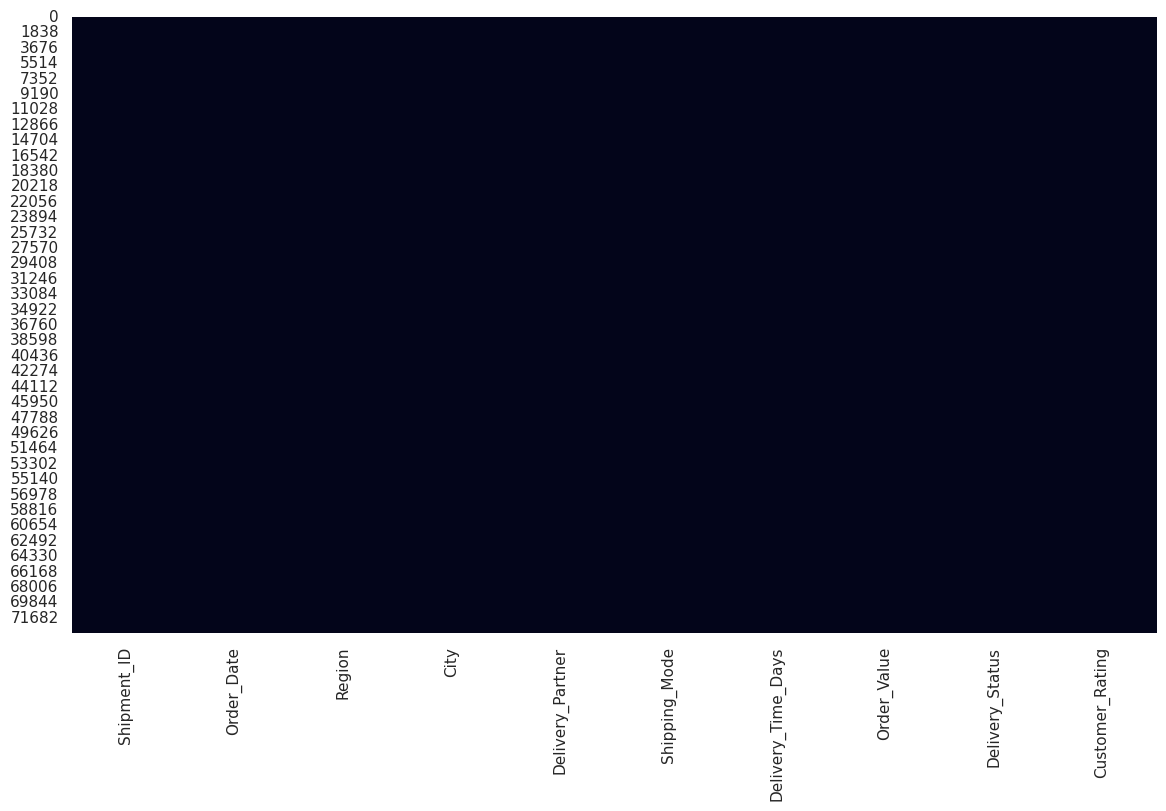

In [40]:
sns.heatmap(df.isnull(),cbar=False)

In [41]:
df.duplicated().sum()

np.int64(3500)

In [42]:
df["Shipment_ID"].duplicated().sum()

np.int64(3500)

In [43]:
df.drop_duplicates("Shipment_ID",inplace=True)

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.shape

(70000, 10)

In [46]:
df.describe()

,Shipment_ID,Delivery_Time_Days,Order_Value,Customer_Rating
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,934999.500000,7.571871,99874.292027,3.315271
std,20207.403759,3.908423,57653.402459,1.111116
min,900000.000000,1.000000,302.070000,1.000000
25%,917499.750000,4.000000,49814.912500,3.000000
50%,934999.500000,8.000000,99813.025000,3.000000
75%,952499.250000,11.000000,149743.875000,4.000000
max,969999.000000,14.000000,199999.600000,5.000000


In [47]:
df.head()

,Shipment_ID,Order_Date,Region,City,Delivery_Partner,Shipping_Mode,Delivery_Time_Days,Order_Value,Delivery_Status,Customer_Rating
0,900000,2022-09-05,North,Ahmedabad,Ecom Express,Standard,8.0,171575.41,Delivered,4.0
1,900001,2023-03-29,West,Ahmedabad,BlueDart,Standard,10.0,8628.10,Delayed,3.0
2,900002,2022-03-23,South,Hyderabad,BlueDart,Standard,12.0,161353.25,Cancelled,3.0
3,900003,2024-01-25,West,Hyderabad,Ecom Express,Standard,14.0,57509.48,Delayed,2.0
4,900004,2023-11-11,South,Mumbai,Ecom Express,Standard,14.0,154628.04,Delivered,1.0


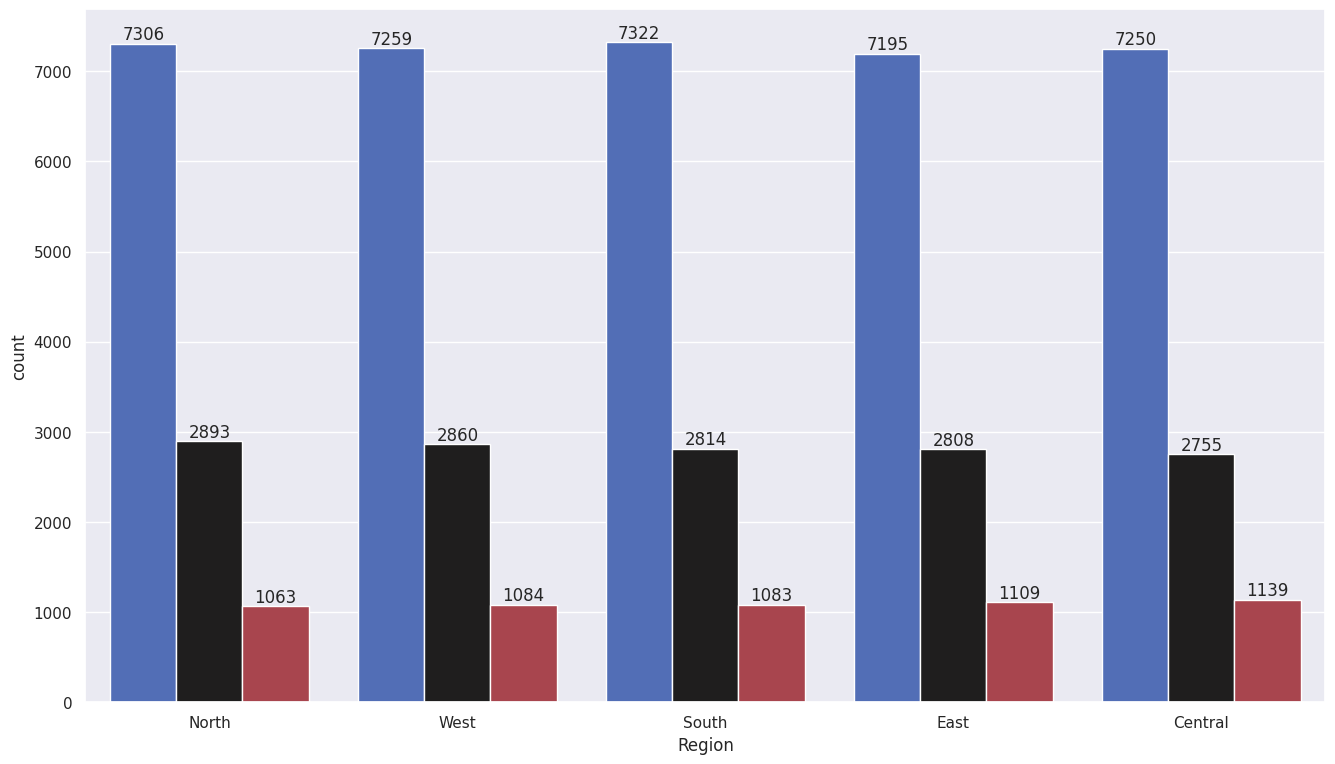

In [48]:
plt.figure(figsize=(16,9))
v=df[df["Region"]!="Unknown"]
g=sns.countplot(data=v,x="Region",hue="Delivery_Status",palette="icefire",legend=False)
for i in g.containers:
  g.bar_label(i)

In [49]:
x=df.groupby("Delivery_Partner",as_index=False)["Delivery_Time_Days"].mean()
x=x[x["Delivery_Partner"]!="Unknown"]
x

,Delivery_Partner,Delivery_Time_Days
0,Amazon Logistics,7.593482
1,BlueDart,7.649419
2,Delhivery,7.601782
3,Ecom Express,7.587373
5,XpressBees,7.511362


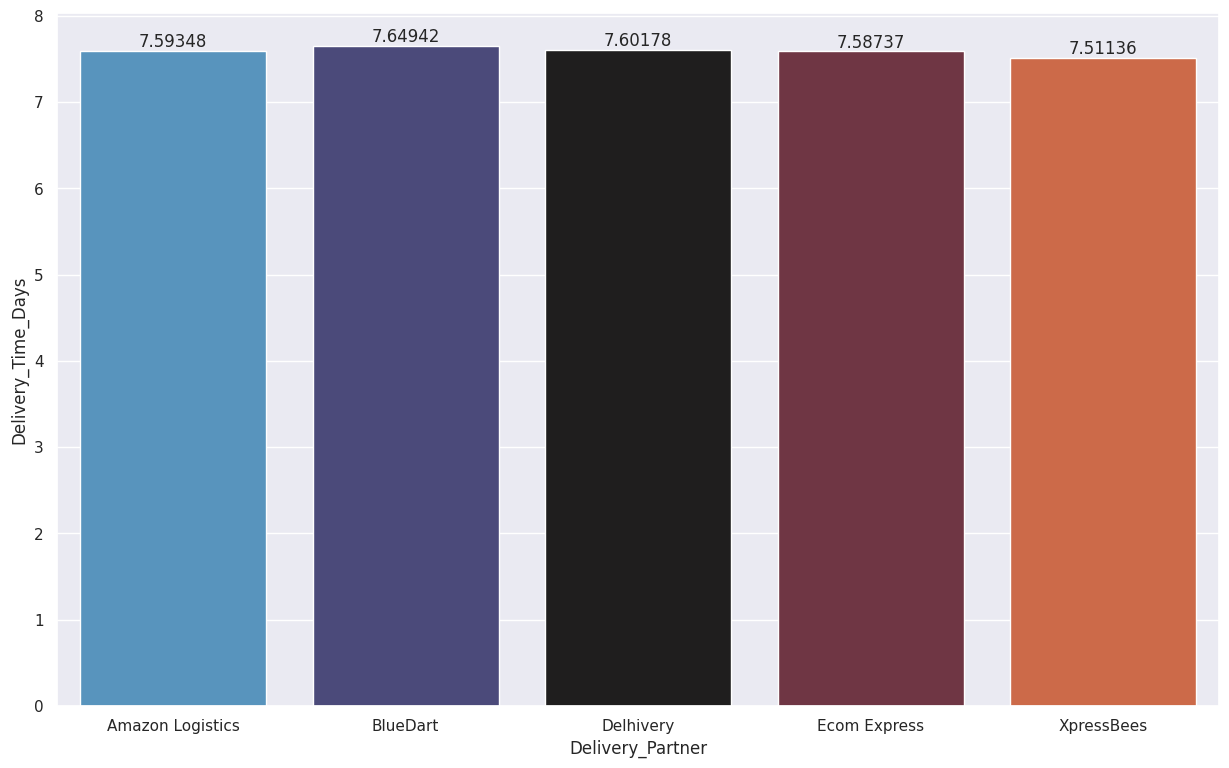

In [50]:
plt.figure(figsize=(15,9))
o=sns.barplot(data=x,x="Delivery_Partner",y="Delivery_Time_Days",palette="icefire",hue="Delivery_Partner",legend=False)
for i in o.containers:
  o.bar_label(i)

In [51]:
y=df.groupby("Shipping_Mode")["Delivery_Time_Days"].mean()
y

,Delivery_Time_Days
Shipping_Mode,
Express,7.565930
Same-Day,7.575746
Standard,7.574808


<Axes: xlabel='Delivery_Time_Days'>

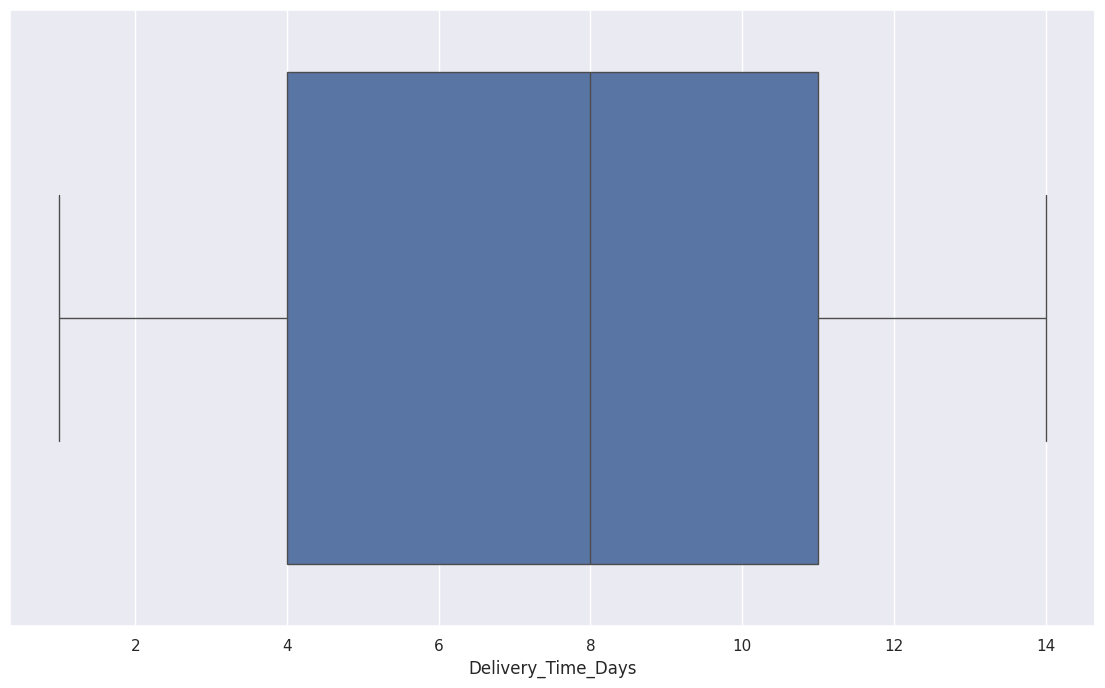

In [52]:
sns.boxplot(data=df,x="Delivery_Time_Days")

In [53]:
b=df.groupby("Delivery_Status",as_index=False)["Order_Value"].sum()
b

,Delivery_Status,Order_Value
0,Cancelled,6.895520e+08
1,Delayed,1.752752e+09
2,Delivered,4.548896e+09


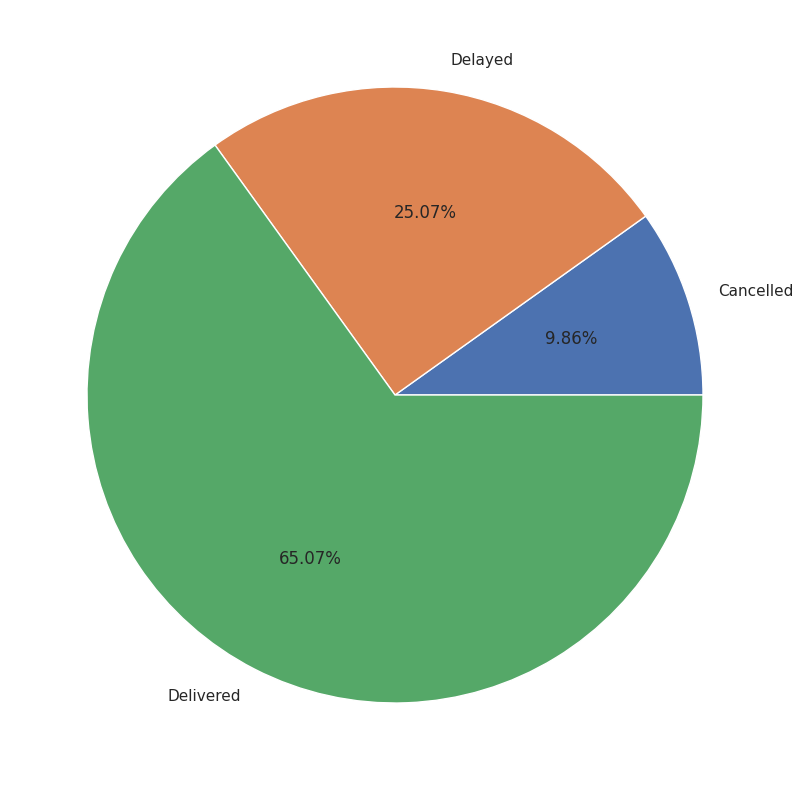

In [54]:
sns.set(rc={'figure.figsize':(10,10)})
plt.pie(b['Order_Value'], labels=b['Delivery_Status'], autopct="%.2f%%")
plt.show()

In [55]:
df[['Customer_Rating','Delivery_Time_Days']].corr()

,Customer_Rating,Delivery_Time_Days
Customer_Rating,1.000000,-0.004203
Delivery_Time_Days,-0.004203,1.000000


<Axes: >

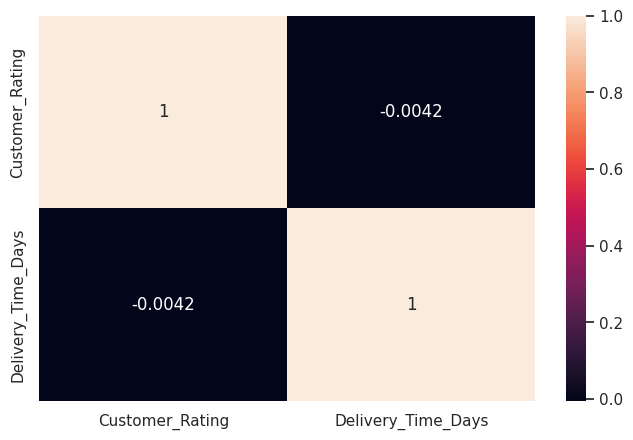

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Customer_Rating','Delivery_Time_Days']].corr(),annot=True)

In [57]:
df.head()

,Shipment_ID,Order_Date,Region,City,Delivery_Partner,Shipping_Mode,Delivery_Time_Days,Order_Value,Delivery_Status,Customer_Rating
0,900000,2022-09-05,North,Ahmedabad,Ecom Express,Standard,8.0,171575.41,Delivered,4.0
1,900001,2023-03-29,West,Ahmedabad,BlueDart,Standard,10.0,8628.10,Delayed,3.0
2,900002,2022-03-23,South,Hyderabad,BlueDart,Standard,12.0,161353.25,Cancelled,3.0
3,900003,2024-01-25,West,Hyderabad,Ecom Express,Standard,14.0,57509.48,Delayed,2.0
4,900004,2023-11-11,South,Mumbai,Ecom Express,Standard,14.0,154628.04,Delivered,1.0


In [58]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"])
df["Year"]=df["Order_Date"].dt.year
df["Year"].unique()

array([2022, 2023, 2024, 2021], dtype=int32)

In [59]:
h=df.groupby("Year",as_index=False)["Order_Value"].sum().sort_values(by="Order_Value",ascending=False)
h

,Year,Order_Value
1,2022,2.570913e+09
2,2023,2.549985e+09
0,2021,1.492125e+09
3,2024,3.781770e+08


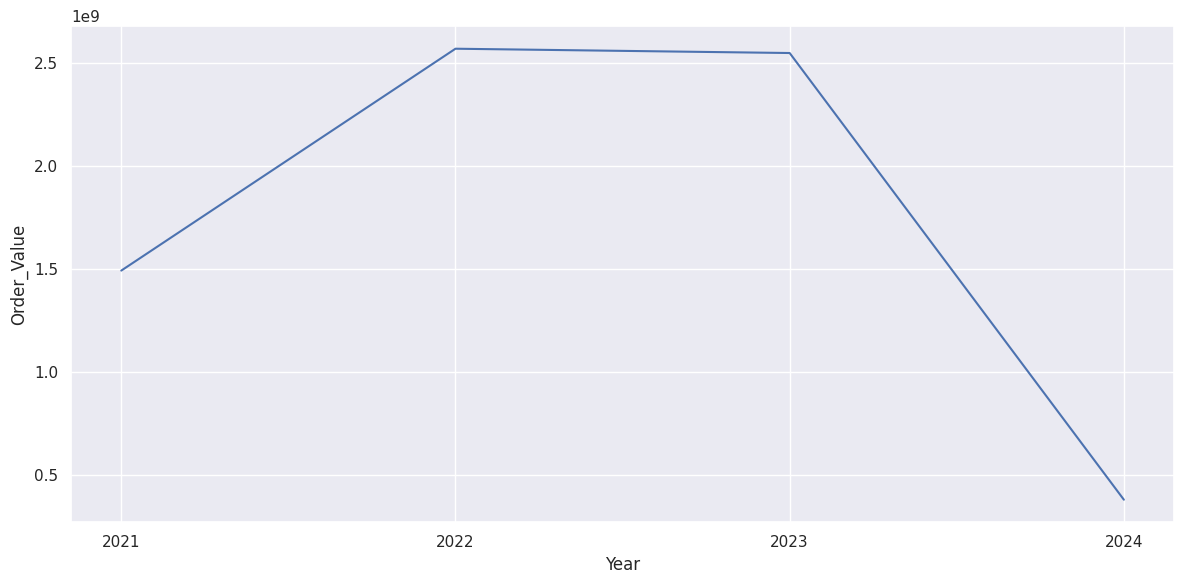

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(data=h,x="Year",y="Order_Value")
plt.xticks([2021,2022,2023,2024])
plt.tight_layout()

In [61]:
p=df.groupby(["Year","Delivery_Status"],as_index=False)["Order_Value"].sum().sort_values(by="Order_Value",ascending=False)
p=p[p["Year"]==2021]
p

,Year,Delivery_Status,Order_Value
2,2021,Delivered,9.760574e+08
1,2021,Delayed,3.705130e+08
0,2021,Cancelled,1.455548e+08


In [62]:
l=df.groupby(["Year","Delivery_Status"],as_index=False)["Order_Value"].sum().sort_values(by="Order_Value",ascending=False)
l=l[l["Year"]==2022]
l

,Year,Delivery_Status,Order_Value
5,2022,Delivered,1.677986e+09
4,2022,Delayed,6.390166e+08
3,2022,Cancelled,2.539108e+08


In [63]:
k=df.groupby(["Year","Delivery_Status"],as_index=False)["Order_Value"].sum().sort_values(by="Order_Value",ascending=False)
k=k[k["Year"]==2023]
k

,Year,Delivery_Status,Order_Value
8,2023,Delivered,1.649345e+09
7,2023,Delayed,6.478854e+08
6,2023,Cancelled,2.527550e+08


In [64]:
j=df.groupby(["Year","Delivery_Status"],as_index=False)["Order_Value"].sum().sort_values(by="Order_Value",ascending=False)
j=j[j["Year"]==2024]
j

,Year,Delivery_Status,Order_Value
11,2024,Delivered,2.455082e+08
10,2024,Delayed,9.533738e+07
9,2024,Cancelled,3.733143e+07


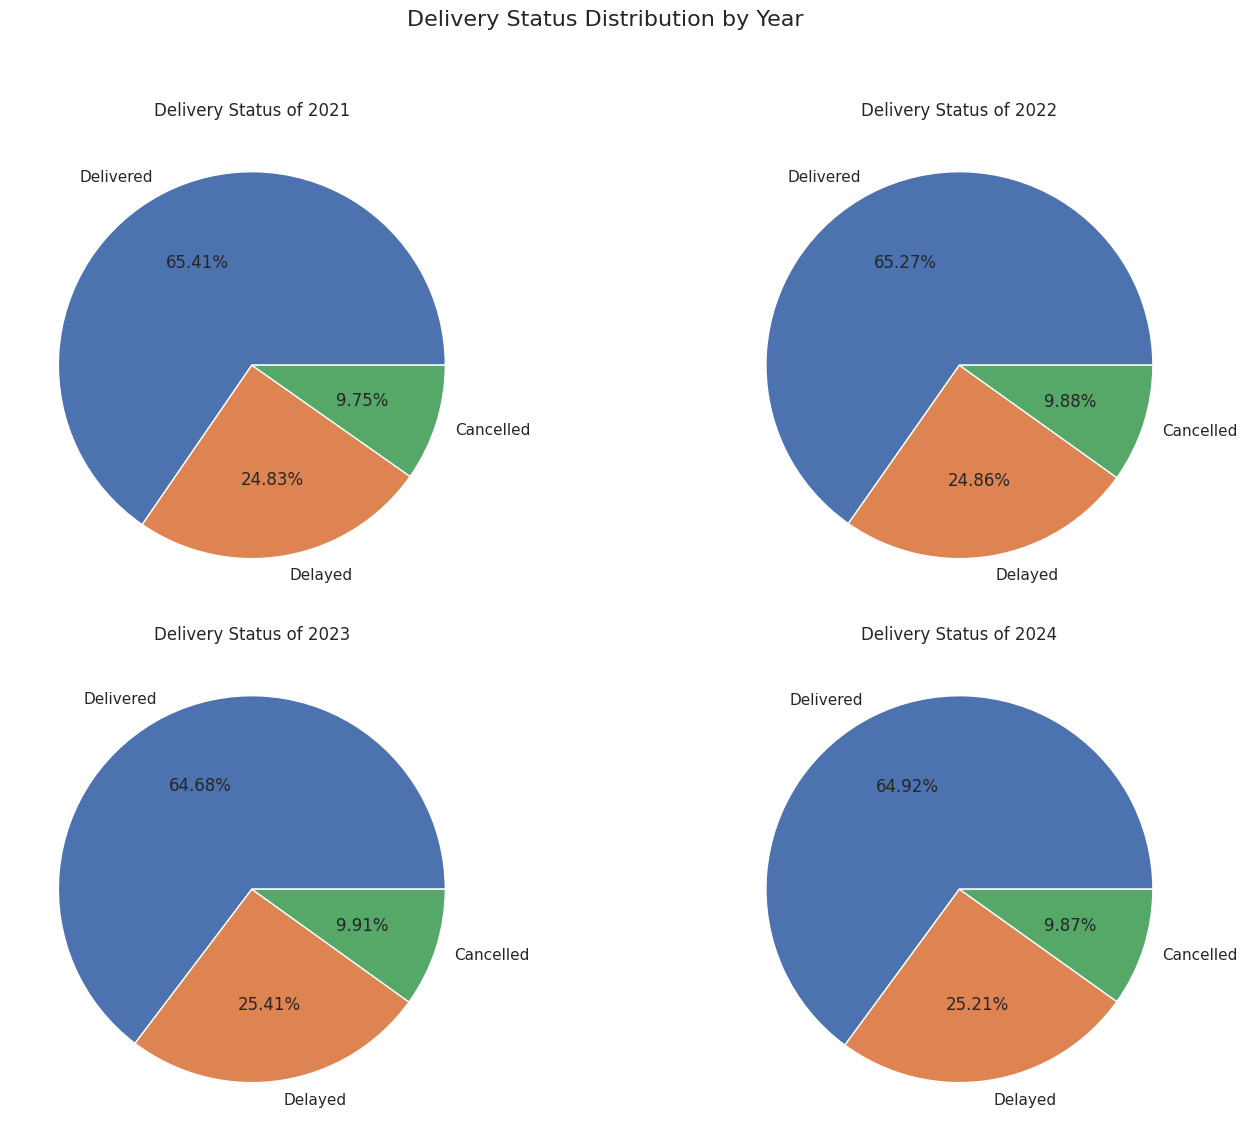

In [65]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.pie(p["Order_Value"],labels=p["Delivery_Status"],autopct="%.2f%%")
plt.title("Delivery Status of 2021")
plt.subplot(2,2,2)
plt.pie(l["Order_Value"],labels=l["Delivery_Status"],autopct="%.2f%%")
plt.title("Delivery Status of 2022")
plt.subplot(2,2,3)
plt.pie(k["Order_Value"],labels=k["Delivery_Status"],autopct="%.2f%%")
plt.title("Delivery Status of 2023")
plt.subplot(2,2,4)
plt.pie(j["Order_Value"],labels=j["Delivery_Status"],autopct="%.2f%%")
plt.title("Delivery Status of 2024")
plt.suptitle("Delivery Status Distribution by Year", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()